In [77]:
%matplotlib inline
import matplotlib as mpl             # 기본 설정 만지는 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [78]:
### 나눔 고딕 설치  
!apt-get update -qq   # 설치를 업데이트   -qq  : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum*  

In [79]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [1]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False 

NanumGothic Eco


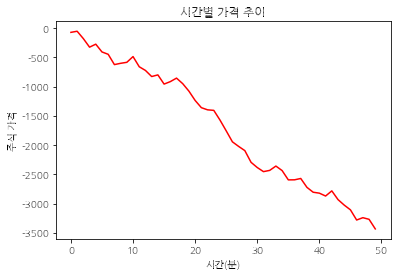

In [2]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

In [3]:
 pip install konlpy

# 애플 아이폰12의 리뷰 데이터 분석
- 데이터 출처 : 네이버 쇼핑 [링크](https://search.shopping.naver.com/catalog/24452875523?cat_id=50001519&frm=NVSCPRO&query=%EC%95%84%EC%9D%B4%ED%8F%B0+12&NaPm=ct%3Dkq6njw54%7Cci%3D7b6a2e5b639c0675d0d121738aa4829401f7c989%7Ctr%3Dsls%7Csn%3D95694%7Chk%3D99f7361259d7e4d400c0c8025811189308e0595f) 의 리뷰 1,527건 (2021.06.21 update)
- 데이터 셋 설명 
  - 파일명 : *iPhone_12.csv* 
  - user_id : 작성자 ID
  - score : 평점
  - date : 작성 일자
  - store : 구매 스토어
  - review_title : 리뷰 제목
  - review_contents : 리뷰 내용

- 프로그래밍에 필요한 파일
  - *iPhone_12.csv*
  - *stopwords_korean.txt*
  - *apple-logo.png*


## 1. 키워드 빈도수 분석
- 리뷰 제목만
- 한국어 엔진 Okt 사용
- 가장 많이 언급된 명사 순서대로 plot
  - 불용어 제거 전
  - 1차 불용어 제거 : *stopwords_korean.txt*으로부터
  - 2차 불용어 제거 : 내 주관적 판단으로 불필요한 단어 제거


In [27]:
import nltk
from konlpy.tag import Okt
import pandas as pd

In [28]:
data = pd.read_csv("iPhone_12.csv", index_col=0)
# data.head()
data.tail()

,user_id,score,date,store,review_title,review_contents
1522,r*g*****,5,20.10.30.,하이마트쇼핑몰,비싸지만 아이폰은 아이폰이네요,비싸지만 아이폰은 아이폰이네요
1523,j*j*****,5,20.11.01.,하이마트쇼핑몰,배송도 빠르고 좋습니다. 감사합,배송도 빠르고 좋습니다. 감사합니다.
1524,hbjy****,5,20.11.07.,애플 공식 브랜드스토어,좋아요좋아요!!!!,좋아요좋아요!!!!
1525,qkqh****,5,20.10.31.,애플 공식 브랜드스토어,너무조아염 키득키득 배송칼배송,너무조아염 키득키득 배송칼배송
1526,kimd****,4,20.11.09.,애플 공식 브랜드스토어,좋아유좋아유좋아유좋아유좋아유,좋아유좋아유좋아유좋아유좋아유


In [29]:
# text = "\n".join(data["review_title"]) # reviewtitle
text = "\n".join(data["review_contents"])
text[:1000]

'화이트 사고 싶어서 품절 풀릴때 까지 하루에 한번씩 들어와서 확인했어요!!! 저는 5-6시 사이 오후시간대에 구매했습니다 여기서 구매한게 가장 합리적이고 만족스러워요 네이버페이 포인트가 이곳 저곳 유용하게 쓰이는데 포인트 많이 쌓이는게 제일 좋았어요bb배송도 하루만에 와서 빨리 받아 볼 수 있었어요!! 뽁뽁이로 싸져서 안전하게 배송됐어요 빠른배송 최고에요그리고 네이버 정식 애플사이트여서 믿고 구매했습니다!! 배송 오자마자 유투브 보면서 불량 확인 했는데 다행히 양품인것 같구요!!볼ㄸㅐ마다ㅠ영롱하고 너무 예뻐요 보고만있어도 흐뭇합니다 오래기다리다 구매해서 그런지 애틋하고 그러네요 ㅠㅠㅠxs쓰다가 넘어왔는데 가장 큰 차이점과 만족감은 일단 유투브 같은 영상의 화질이 너무 좋구요 그리고 무게도 너무 가벼워서 이전폰은 어떻게 썼나 싶네요!! 구매할때 강화필름 케이스 페키지가 품절이여서 같이 구매못한게 슬펐지만 예쁜 아이폰을 합리적이게 구매했다는 점에서 가장 만족스러워요!! 너~~~무 예쁩니다 꼭 사세요 두번 사세요 ㅠㅠㅠ\n포인트 받는거 까지 생각 하면 가격 괜찮게 구매 한것 같아요 배송도 다음날 바로 와서 걱정 없었고요  씨타입 케이블이라 충전기는 그전에 사용하던 케이블충전기를 계속 사용해야겠어요 ㅠ 이건 미리 알고 있던거라 ~~~ 그리고 생각보다 무겁지 않아요 디자인도 이쁘고 그립감도 좋어요화이트로 하길 잘한것 같아요 12프로랑 고민 했는데 12도 나쁘지 않는것 같습니다\n아이폰6를 사용하다. 19년초 맛챙이라 가서. 갤럭시 처음 써보고.생각 보다갤럭시가 괜찮있다가. 에스케이는. 쓰레기장은 내구성에 질렸습니다. 몇번떨궜더니 액정이나감. 이전. 아이폰4,6. 아무리떨궈도. 액정 나간적ㅇ없었는데. 마침 12 가 새로나왔다길래. 검정 흰색 사죄하고. 빨강 민트 파란 중 고민이많았습니다. 생각보다. 그린이. 남자랑. 잘맞네요. 여성. 여성하진않아요가격이너무비싸성망설여지고. 원래 핸드폰 욕심도없긴한데. 큰맘먹고 큰지출로 6년이상은버텨보갰습니다. 화면은 커졌는데 오타는 작

In [30]:
okt = Okt()
text_nouns = okt.nouns(text)
print(type(text_nouns))
print(len(text_nouns))
print(text_nouns[:10]) # 중복된 값이 존재

<class 'list'>
8633
['화이트', '사고', '품절', '때', '하루', '한번', '확인', '저', '사이', '오후']


In [31]:
import nltk

ko = nltk.Text(text_nouns, name='review_title')
print(type(ko))
print(ko[:10])
print(ko.vocab().most_common(50))

<class 'nltk.text.Text'>
['화이트', '사고', '품절', '때', '하루', '한번', '확인', '저', '사이', '오후']
[('배송', 679), ('아이폰', 290), ('구매', 179), ('화이트', 170), ('사용', 127), ('폰', 95), ('제품', 94), ('주문', 80), ('색상', 78), ('것', 73), ('바로', 72), ('역시', 69), ('생각', 64), ('아주', 59), ('할인', 56), ('만족', 56), ('정말', 54), ('재고', 54), ('블랙', 54), ('양품', 52), ('포장', 50), ('더', 50), ('고민', 49), ('처음', 49), ('구입', 49), ('그린', 47), ('상품', 46), ('선물', 44), ('진짜', 43), ('도착', 43), ('이상', 42), ('불량', 41), ('좀', 41), ('하루', 40), ('케이스', 40), ('날', 39), ('맘', 39), ('완전', 39), ('자급', 37), ('최고', 36), ('계속', 36), ('디자인', 36), ('액정', 36), ('문제', 36), ('사진', 36), ('제', 36), ('품절', 35), ('화면', 35), ('마음', 35), ('애플', 34)]


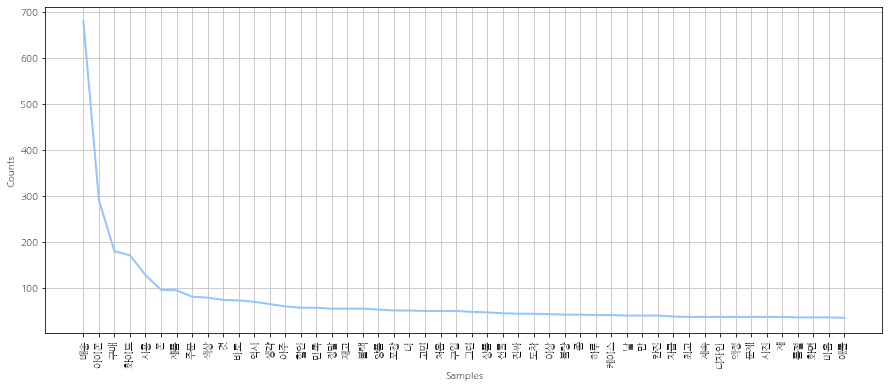

In [32]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

### 1차 불용어 제거 
- 파일 *stopwords_korean.txt*로부터
- 한국어 불용어 사전

In [33]:
stop_words = open("stopwords_korean.txt").read()
stop_words

'아\n휴\n아이구\n아이쿠\n아이고\n어\n나\n우리\n저희\n따라\n의해\n을\n를\n에\n의\n가\n으로\n로\n에게\n뿐이다\n의거하여\n근거하여\n입각하여\n기준으로\n예하면\n예를 들면\n예를 들자면\n저\n소인\n소생\n저희\n지말고\n하지마\n하지마라\n다른\n물론\n또한\n그리고\n비길수 없다\n해서는 안된다\n뿐만 아니라\n만이 아니다\n만은 아니다\n막론하고\n관계없이\n그치지 않다\n그러나\n그런데\n하지만\n든간에\n논하지 않다\n따지지 않다\n설사\n비록\n더라도\n아니면\n만 못하다\n하는 편이 낫다\n불문하고\n향하여\n향해서\n향하다\n쪽으로\n틈타\n이용하여\n타다\n오르다\n제외하고\n이 외에\n이 밖에\n하여야\n비로소\n한다면 몰라도\n외에도\n이곳\n여기\n부터\n기점으로\n따라서\n할 생각이다\n하려고하다\n이리하여\n그리하여\n그렇게 함으로써\n하지만\n일때\n할때\n앞에서\n중에서\n보는데서\n으로써\n로써\n까지\n해야한다\n일것이다\n반드시\n할줄알다\n할수있다\n할수있어\n임에 틀림없다\n한다면\n등\n등등\n제\n겨우\n단지\n다만\n할뿐\n딩동\n댕그\n대해서\n대하여\n대하면\n훨씬\n얼마나\n얼마만큼\n얼마큼\n남짓\n여\n얼마간\n약간\n다소\n좀\n조금\n다수\n몇\n얼마\n지만\n하물며\n또한\n그러나\n그렇지만\n하지만\n이외에도\n대해 말하자면\n뿐이다\n다음에\n반대로\n반대로 말하자면\n이와 반대로\n바꾸어서 말하면\n바꾸어서 한다면\n만약\n그렇지않으면\n까악\n툭\n딱\n삐걱거리다\n보드득\n비걱거리다\n꽈당\n응당\n해야한다\n에 가서\n각\n각각\n여러분\n각종\n각자\n제각기\n하도록하다\n와\n과\n그러므로\n그래서\n고로\n한 까닭에\n하기 때문에\n거니와\n이지만\n대하여\n관하여\n관한\n과연\n실로\n아니나다를가\n생각한대로\n진짜로\n한적이있다\n하곤하였다\n하\n하하\n허허\n아하\n거바\n와\n오\n왜\n어째서\n무엇때문에\n어찌\n하겠는가\n무슨\n어디\n어느곳\n더

In [34]:
ko_sw1 = [] # StopWords1
for one in ko:
  if one not in stop_words:
    ko_sw1.append(one)

In [35]:
ko_sw1 = nltk.Text(ko_sw1, name='review_title_stopwords_1')
print(type(ko_sw1))
print(ko_sw1[:10])
print(ko_sw1.vocab().most_common(100))

<class 'nltk.text.Text'>
['화이트', '사고', '품절', '하루', '한번', '확인', '사이', '오후', '시간대', '구매']
[('배송', 679), ('아이폰', 290), ('구매', 179), ('화이트', 170), ('사용', 127), ('폰', 95), ('제품', 94), ('주문', 80), ('색상', 78), ('역시', 69), ('아주', 59), ('할인', 56), ('만족', 56), ('정말', 54), ('재고', 54), ('블랙', 54), ('양품', 52), ('포장', 50), ('고민', 49), ('처음', 49), ('구입', 49), ('그린', 47), ('상품', 46), ('선물', 44), ('불량', 41), ('하루', 40), ('케이스', 40), ('날', 39), ('맘', 39), ('완전', 39), ('자급', 37), ('최고', 36), ('계속', 36), ('디자인', 36), ('액정', 36), ('문제', 36), ('사진', 36), ('품절', 35), ('화면', 35), ('애플', 34), ('네이버', 32), ('그냥', 32), ('가격', 31), ('걱정', 31), ('매우', 30), ('포인트', 27), ('실물', 27), ('핸드폰', 26), ('색', 26), ('카드', 25), ('갤럭시', 24), ('확인', 23), ('보고', 23), ('화질', 23), ('카메라', 23), ('블루', 22), ('프로', 21), ('택배', 21), ('필름', 20), ('유심', 20), ('기분', 20), ('물건', 20), ('듭니', 20), ('공식', 19), ('쌈무', 19), ('무게', 18), ('상태', 18), ('빨', 18), ('레드', 18), ('색깔', 17), ('다행', 17), ('굿', 17), ('오후', 16), ('저녁', 16), ('결제', 16), ('이

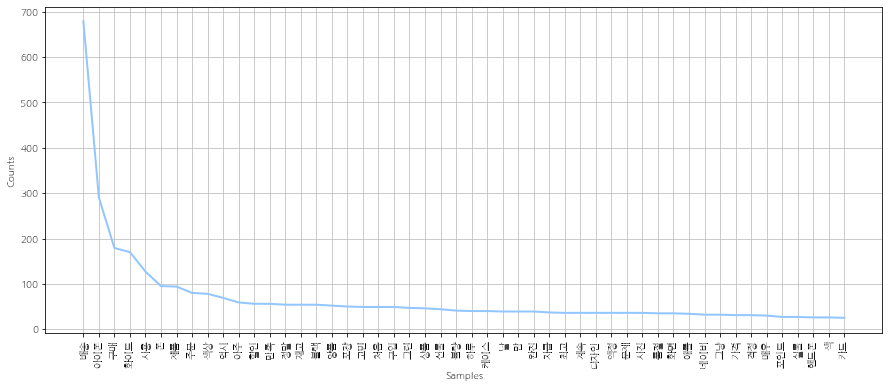

In [36]:
plt.figure(figsize=(15,6))
ko_sw1.plot(50)
plt.show()

### 2차 불용어 제거 
- `ko_sw1.vocab().most_common(100)` 중 의미가 없다고 판단되는 단어들을 제거
- 주관성 개입

<class 'nltk.text.Text'>
['화이트', '사고', '품절', '하루', '한번', '사이', '오후', '시간대', '가장', '합리']
[('화이트', 170), ('색상', 78), ('역시', 69), ('아주', 59), ('할인', 56), ('만족', 56), ('정말', 54), ('재고', 54), ('블랙', 54), ('양품', 52), ('포장', 50), ('고민', 49), ('처음', 49), ('구입', 49), ('그린', 47), ('선물', 44), ('불량', 41), ('하루', 40), ('케이스', 40), ('완전', 39), ('자급', 37), ('최고', 36), ('디자인', 36), ('액정', 36), ('문제', 36), ('사진', 36), ('품절', 35), ('화면', 35), ('애플', 34), ('네이버', 32), ('그냥', 32), ('가격', 31), ('걱정', 31), ('매우', 30), ('포인트', 27), ('실물', 27), ('색', 26), ('카드', 25), ('갤럭시', 24), ('화질', 23), ('카메라', 23), ('블루', 22), ('프로', 21), ('택배', 21), ('필름', 20), ('유심', 20), ('기분', 20), ('공식', 19), ('쌈무', 19), ('무게', 18)]


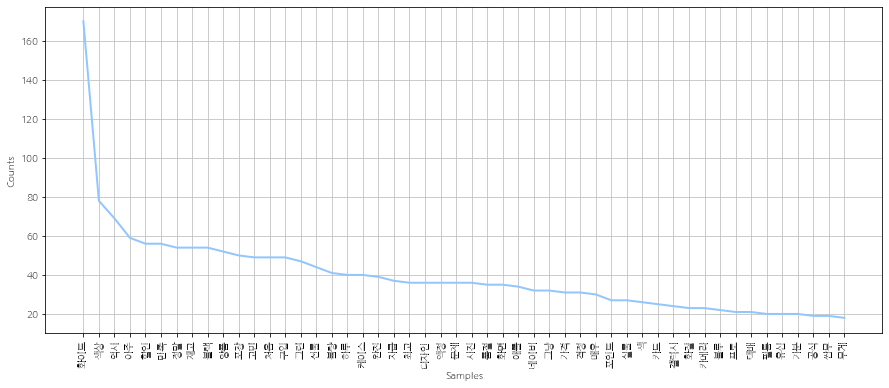

In [38]:
my_stop_words = "배송\n아이폰\n구매\n사용\n폰\n주문\n제품\n상품\n계속\n맘\n날\n핸드폰\n확인\n보고\n물건\n듭니\n사서\n뭐" 

ko_sw2 = []
for one in ko_sw1:
  if one not in my_stop_words:
    ko_sw2.append(one)

ko_sw2 = nltk.Text(ko_sw2, name='review_title_stopwords_2')
print(type(ko_sw2))
print(ko_sw2[:10])
print(ko_sw2.vocab().most_common(50))

plt.figure(figsize=(15,6))
ko_sw2.plot(50)
plt.show()

## 2. 키워드 빈도수 시각화
- wordcloud 사용
- *apple-logo.png* 파일로 mask를 시도하였지만 잘안됨

In [39]:
from wordcloud import WordCloud
from PIL import Image

In [80]:
logo_mask = np.array(Image.open('Draw_car1.png'))
# logo_mask.shape # 4=rgba
logo_mask[3]

(1024, 1024, 4)

In [109]:
logo_mask = np.array(Image.open('apple-logo.png'))

for i in range(880):
    for j in range(820):
        for k in range(3):
          if logo_mask[i][j][k]==0:
            logo_mask[i][j][k] = 255

logo_mask[0]

array([[248, 248, 248],
       [247, 247, 247],
       [247, 247, 247],
       ...,
       [247, 247, 247],
       [247, 247, 247],
       [247, 247, 247]], dtype=uint8)

In [51]:
data = ko_sw2.vocab().most_common(1000)
data[:10]

[('화이트', 170),
 ('색상', 78),
 ('역시', 69),
 ('아주', 59),
 ('할인', 56),
 ('만족', 56),
 ('정말', 54),
 ('재고', 54),
 ('블랙', 54),
 ('양품', 52)]

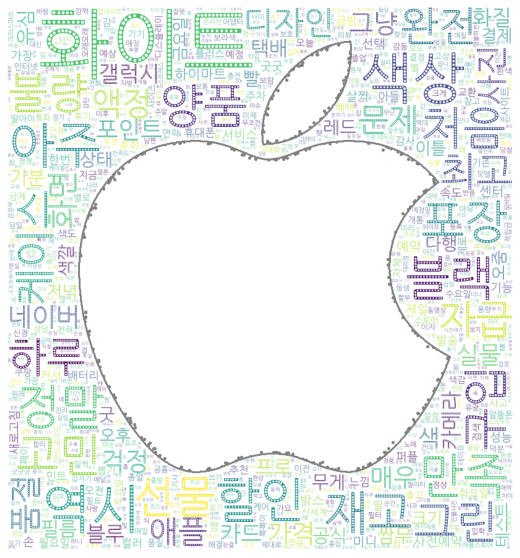

In [111]:
wc = WordCloud(background_color='white', # 결과 이미지 배경색
               max_words=1000,
               mask=logo_mask,
               contour_width=2,
               contour_color='gray',
               font_path=path).generate_from_frequencies(dict(data))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()